## Book Price EDA

The following notebooks will explore the general trend of sales and pricing options
for books using both kindle and sales dataset.

Note that both of the data compare between ebooks vs kindle ebooks on Amazon
and not hardcover/paperback. Nevertheless, it should gives us some ides on
the pricing trend of the market.

##### Dependencies

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-white')

In [7]:
# cleaned book sales dataset
data_path = 'D:\\PycharmProjects\\springboard\\data\\'
sales = pd.read_csv(f'{data_path}book_sales.csv', index_col=[0])
kindle = pd.read_csv(f'{data_path}book_kindle.csv')

# First impression of the data
sales.head()

,genre,sold_by,daily_average_units_sold,publisher_name,publisher_type,average_rating,sale_price,total_reviews,price_range
0,genre fiction,HarperCollins Publishers,7000,Katherine Tegen Books,big five,4.57,4.88,9604,normal
1,genre fiction,HarperCollins Publishers,6250,HarperCollins e-books,big five,4.47,1.99,450,cheap
2,genre fiction,"Amazon Digital Services, Inc.",5500,(Small or Medium Publisher),small/medium,4.16,8.69,30,normal
3,fiction,Hachette Book Group,5500,"Little, Brown and Company",big five,3.84,7.50,3747,normal
4,genre fiction,Penguin Group (USA) LLC,4750,Dutton Children's,big five,4.75,7.99,9174,normal


## Publishers and sales

First, we observes how publishers influence the books sales and prices.
Notice big-five and indie publishers have the largest daily sales.

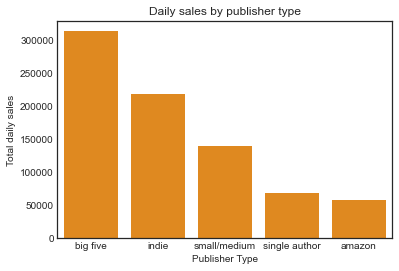

In [13]:
# total sales group by distributors
df = sales.groupby('publisher_type')[['publisher_type','daily_average_units_sold']]\
    .sum().sort_values(by='daily_average_units_sold',ascending=False)

# Bar plot of the total daily sales
sns.barplot(x=df.index, y='daily_average_units_sold', data=df, color='darkorange')
plt.ylabel('Total daily sales')
plt.xlabel('Publisher Type')
plt.title('Daily sales by publisher type')
plt.savefig('D:\\PycharmProjects\\springboard\\book_analysis\\images\\daily_sales_by_publisher.png')

In [27]:
# Get daily sales percentage for plot
df['daily_sale_percentage'] = df.daily_average_units_sold/df.daily_average_units_sold.sum()
df['daily_sale_percentage'] = np.round(df.daily_sale_percentage, 2)

,daily_average_units_sold,daily_sale_percentage
publisher_type,,
big five,313892,0.39
indie,219331,0.27
small/medium,140644,0.18
single author,69152,0.09
amazon,57360,0.07


Small/medium publishers issued the most books but have lackluster sales
compared to the big five and indie.

One of the reason is perhaps the resources behind big five publishers that
greatly influence sales from editors to advertising.

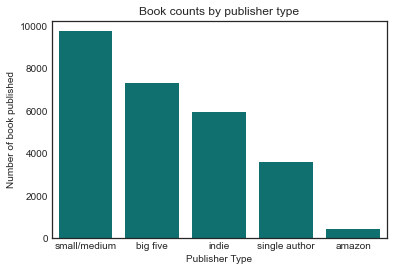

In [24]:
# books count group by distributors
df2 = sales.groupby('publisher_type')[['publisher_type','daily_average_units_sold']]\
    .count().sort_values(by='daily_average_units_sold',ascending=False)

# Bar plot of the total daily sales
sns.barplot(x=df2.index, y='daily_average_units_sold', data=df2, color='teal')
plt.ylabel('Number of book published')
plt.xlabel('Publisher Type')
plt.title('Book counts by publisher type')
plt.savefig('D:\\PycharmProjects\\springboard\\book_analysis\\images\\book_count_by_publisher.png')

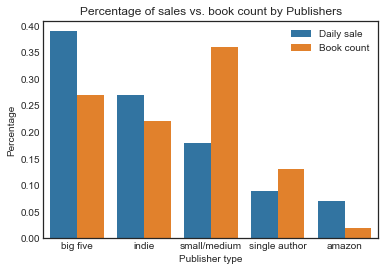

In [46]:
# Get count percentage
df2['book_count_percentage'] = df2['daily_average_units_sold'] / df2['daily_average_units_sold'].sum()
df2['book_count_percentage'] = np.round(df2['book_count_percentage'],2)

# Join and plot 2 percentages
df3 = df.merge(df2, how='left',on=None, left_index=True,
         right_index=True)[['daily_sale_percentage', 'book_count_percentage']]
df3['publisher_type'] = df3.index
df3 = df3.melt(id_vars=['publisher_type'])

# Side by side bar plot
sns.barplot(x='publisher_type', y='value', hue='variable', data=df3)
plt.xlabel('Publisher type')
plt.ylabel('Percentage')
plt.title('Percentage of sales vs. book count by Publishers')
L = plt.legend()
L.get_texts()[0].set_text('Daily sale')
L.get_texts()[1].set_text('Book count')
plt.savefig('D:\\PycharmProjects\\springboard\\book_analysis\\images\\sale_book_count_percentage.png')

We also observe that big-five and small/mediums publishers price their books
quite higher than everyone else.

d:\pycharmprojects\springboard\venv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


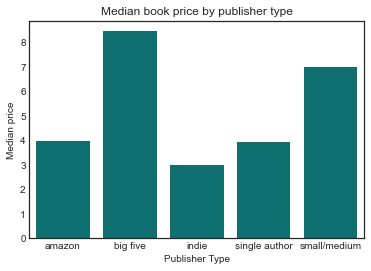

In [48]:
# books pricing through publishers
df = sales.groupby('publisher_type')['publisher_type','sale_price'].median()

# Bar plot of the total daily sales
sns.barplot(x=df.index, y='sale_price', data=df, color='teal')
plt.ylabel('Median price')
plt.xlabel('Publisher Type')
plt.title('Median book price by publisher type')
plt.savefig('D:\\PycharmProjects\\springboard\\book_analysis\\images\\book_price_by_publisher.png')

## Publisher type and price segment

Notice that most books that are have over 1000 sales are published by
big five, indie and some amazon. Rarely does a small/medium publisher
have a bestsellers here.

In [ ]:
# Price and unit sold break down by publisher type
sns.scatterplot(x='sale_price', y='daily_average_units_sold', data=sales, 
                hue='publisher_type')
plt.xticks(np.linspace(sales.sale_price.min(), sales.sale_price.max(),num=20), rotation=70)
plt.ylabel('Daily average unit sold')
plt.xlabel('Book Price')
plt.title('Price vs Unit sold')
plt.savefig('images/daily_sales_vs_price_by_publisher.png')

In [ ]:
# Zoom in the plot above to price under 20 only
sns.scatterplot(x='sale_price', y='daily_average_units_sold', data=sales[sales.daily_average_units_sold > 1000],
                hue='publisher_type')
plt.xticks(np.arange(13))
plt.xlabel('Sale Price')
plt.ylabel('Daily Average Unit Sold (>1000)')
plt.title('Price vs Unit sold (>1000)')
plt.savefig('images/daily_sales_1000_unit_sold_by_publisher.png')

## Pricing on books

While there are many expensive books which is price at over $50, the majority of books are 
affordable (median = 5.12). Moreover, all books published by amazon are all under 20 dollars.

The important finding here is all books that are sold over 1000 units per day have a price tag of
less than 15 dollars.

Moreover, big five publishers can afford to price their books much higher
than anyone else to given the same sales figures.

In [ ]:
# Median sale price
print('Median book price:', sales.sale_price.median())
print('Mean book price:', sales.sale_price.mean())

In [ ]:
# Number of book price under 15 dollars
under_15 = sum([True for x in sales.sale_price if x < 15])
over_15 = len(sales) - under_15

# Proportion of books sales under 20 vs over 20
df = pd.DataFrame({'n':[under_15, over_15]},
                  index=['under 15', 'over 15'])
df.plot.pie(y='n', colors=['cadetblue', 'maroon'],
            labels=['Under $15', 'Over $15'])
plt.ylabel('')
plt.title('Proportion of book ebook price')
plt.tight_layout()
plt.savefig('images/proportion_book_under15.png')

In [ ]:
# Sale price box plot
sns.boxplot(x='sale_price', y='publisher_type', data=sales)
plt.title('Box plot of sale price separated by publisher_type')
plt.savefig('images/sale_price_by_publisher_type.png')

In [ ]:
# Sale price distribution
sns.distplot(sales.sale_price, kde=True, rug=True)
plt.title('Book sale price distribution')

Lets take a look at books publisher broken down through a price range.

In [ ]:
for price in [20, 40, 80, 100]:
    print(f'Price over ${price}\n', 
          sales[sales.sale_price > price].publisher_type.value_counts(), '\n\n')

## Veblen goods

We suspect books should have some properties of veblen goods where the higher
the price, the higher the demand - up to a certain point.

In [ ]:
sns.scatterplot(x='sale_price', y='daily_average_units_sold', data=sales[sales.price_range!='extra'],
                hue='price_range')
plt.ylabel('Daily Average Unit Sold')
plt.xlabel('Sale Price')
plt.title('Sales Price vs Unit Sold')
plt.savefig('images/sale_price_unit_sold.png')

In [ ]:
sns.scatterplot(x='sale_price', y='daily_average_units_sold',
                data=sales[(sales.daily_average_units_sold > 1000) & (sales.sale_price < 20)],
                hue='price_range')
plt.ylabel('Daily Average Unit Sold')
plt.xlabel('Sale Price')
plt.title('Sales Price vs Unit Sold (1000+)')
plt.savefig('images/sale_price_unit_sold_1000.png')

In [ ]:
# book count by price range
sales.groupby('price_range').size().plot(kind='barh')
plt.title('Book count based on price range')
plt.xlabel('Book Count')
plt.ylabel('Price range')
plt.savefig('images/book_count_price_range.png')

In [ ]:
# kindle book price distribution
sns.distplot(kindle[kindle.price < 40].price)
plt.ylabel('Percentage')
plt.xlabel('Price')
plt.title('Price Distribution of Kindle ebooks')
plt.savefig('images/price_kindle_dist.png')

## Price and genre

Non fiction books sell at a much higher median price than others espcially
fiction and genre fiction.

Note that comics are also priced a bit higher than all other genre perhaps
due to production value (color, pictures...)

In [ ]:
# median price group by genre
df = sales.groupby('genre')['sale_price', 'genre'].median()

# Plot
sns.barplot(y=df.index, x='sale_price', data=df, color='seagreen')
plt.ylabel('Genre')
plt.xlabel('Median Book Price')
plt.title('Median book price by Genre')
plt.tight_layout()
plt.savefig('images/book_price_by_genre.png')

## Price and number of reviews

It seems the number of reviews has some small to no effect on price as
seen on both log scaled plot.

In [ ]:
# Log price and number of customer reviews of kindle books.
plt.scatter(y=np.log(sales.sale_price), x=np.log(sales.total_reviews), alpha=0.2)
plt.xlabel('Log number of reviews')
plt.ylabel('Log of price')
plt.title('Log price vs number of reviews on ebooks')
plt.savefig('images/log_price_number_reviews.png')